### a)i) Installing beautiful soup below

In [8]:
pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=4c870f7f1c840f6500f8ab273f06616770d600ad123a91a1995ebe27239d45fc
  Stored in directory: /Users/sanjliagarwal/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_data=pd.read_csv('stack_stats_2020_train.csv')
test_data=pd.read_csv('stack_stats_2020_test.csv')
train_data.head()

,Id,Score,Body,Title,Tags
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...


In [5]:
import re
def removeLine(text):
    text = re.sub('\n', '', text)
    return text;

### a)ii) We will use Beautiful soup for parsing the HTML data. To remove the '\n' character from the data, we use a custom function.

In [6]:
# dealing with line break
from bs4 import BeautifulSoup
train_data['Body'] = train_data['Body'].apply(lambda x:BeautifulSoup(x, 'html.parser').get_text())
train_data['Body'] = train_data['Body'].apply(lambda text: removeLine(text))

### a)iii) Now we analyse the body,title and tags to see further changes if required

#### Before doing any kind of data analysis, i think we should make the data simpler by the following operations
1. For body, title and tags, we will convert them to lowercase to make it easy to process
2. We will remove punctuations to make it easier to convert into vectors.
3. We will remove any kind of websites present in the body or title as they are not relevant in evaluating the content of the question 
4. We might also want to remove words containing numbers as they are invalid words.
5. We might want to remove words that are not in english languaage or are not numbers, as there are a few records having data in other languages which is not of significance to us
#### We have implemented the following clean_text function to clean the data

In [7]:
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    #text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    #text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #text = re.sub('\w*\d\w*', '', text)
    text=re.sub('^a-zA-Z0-9 -','',text)
    return text


In [8]:
def tagsConvert(text):
    text=re.sub('><',' ',text)
    text=re.sub('<','',text)
    text=re.sub('>','',text)
    return text

In [9]:
import nltk
#nltk.download('punkt')

In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [11]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [12]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [13]:
train_data['Body'] = train_data['Body'].apply(lambda x:clean_text(x))
train_data['Title'] = train_data['Title'].apply(lambda x:removeLine(x))
train_data['Title'] = train_data['Title'].apply(lambda x:clean_text(x))
train_data['Tags'] = train_data['Tags'].apply(lambda x:tagsConvert(x))
train_data

,Id,Score,Body,Title,Tags
0,495560,1,i have a set of data that i am transforming us...,r emmeans back tranform clr data using clrinv,r mixed-model linear lsmeans
1,489896,0,we are sending a one bit message to someone t...,trying to determine the failure rate of redund...,probability python
2,497951,2,i am aware that there is a similar post vector...,how to derive categorical cross entropy update...,logistic cross-entropy
3,478542,2,i have a poisson distributed glm where i have ...,learning more about glm parameters how to dig ...,generalized-linear-model interpretation
4,458388,0,1 how do i decide which transformation or scal...,is there i guide to decide which transformatio...,python data-transformation dataset feature-eng...
...,...,...,...,...,...
19242,464995,0,im currently trying to implement a decision tr...,how does decision tree classify tuple whose co...,classification cart
19243,477516,0,what are the available tools results that can ...,what are the available tools results that can ...,convergence asymptotics central-limit-theorem ...
19244,461894,1,let xnx1x2xn denote a sample where 1 ximathbf ...,maximum likelihood estimator for censored data,estimation maximum-likelihood censoring
19245,498148,0,i have a data set of property sales where info...,can you use a single missingness indicator for...,missing-data data-preprocessing indicator-func...


### a)iv) Now we will use nltk to generate dcument term matrices

In [14]:
from nltk.tokenize import word_tokenize
body=train_data['Body']
title=train_data['Title']
tags=train_data['Tags']
body_tokenized =body.apply(word_tokenize)
title_tokenized=title.apply(word_tokenize)
tags_tokenized=tags.apply(word_tokenize)
print(body_tokenized)

0        [i, have, a, set, of, data, that, i, am, trans...
1        [we, are, sending, a, one, bit, message, to, s...
2        [i, am, aware, that, there, is, a, similar, po...
3        [i, have, a, poisson, distributed, glm, where,...
4        [1, how, do, i, decide, which, transformation,...
                               ...                        
19242    [im, currently, trying, to, implement, a, deci...
19243    [what, are, the, available, tools, results, th...
19244    [let, xnx1x2xn, denote, a, sample, where, 1, x...
19245    [i, have, a, data, set, of, property, sales, w...
19246    [i, have, data, from, a, human, subject, exper...
Name: Body, Length: 19247, dtype: object


In [15]:
body_no_stop = body_tokenized.apply(remove_stopwords)
title_no_stop = title_tokenized.apply(remove_stopwords)
tags_no_stop = tags_tokenized.apply(remove_stopwords)

body_no_stop

0        [set, data, transforming, using, clr, function...
1        [sending, one, bit, message, someone, 60, chan...
2        [aware, similar, post, vectorization, cross, e...
3        [poisson, distributed, glm, identified, origin...
4        [1, decide, transformation, scaling, use, pass...
                               ...                        
19242    [im, currently, trying, implement, decision, t...
19243    [available, tools, results, used, pin, rate, c...
19244    [let, xnx1x2xn, denote, sample, 1, ximathbf, 1...
19245    [data, set, property, sales, information, prev...
19246    [data, human, subject, experiment, repeated, m...
Name: Body, Length: 19247, dtype: object

In [16]:
body_stemmed = body_no_stop.apply(stemmer)
title_stemmed = title_no_stop.apply(stemmer)
tags_stemmed = tags_no_stop.apply(stemmer)


body_stemmed

0        [set, data, transform, use, clr, functionlibra...
1        [send, one, bit, messag, someon, 60, chanc, me...
2        [awar, similar, post, vector, cross, entropi, ...
3        [poisson, distribut, glm, identifi, origin, pa...
4        [1, decid, transform, scale, use, pass, data, ...
                               ...                        
19242    [im, current, tri, implement, decis, tree, ind...
19243    [avail, tool, result, use, pin, rate, converg,...
19244    [let, xnx1x2xn, denot, sampl, 1, ximathbf, 1ep...
19245    [data, set, properti, sale, inform, previou, s...
19246    [data, human, subject, experi, repeat, measur,...
Name: Body, Length: 19247, dtype: object

In [17]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

body_detokenized = body_stemmed.apply(TreebankWordDetokenizer().detokenize)
title_detokenized = title_stemmed.apply(TreebankWordDetokenizer().detokenize)
tags_detokenized = tags_stemmed.apply(TreebankWordDetokenizer().detokenize)

#### As there are a lot of words, we will choose just top 5% in the body, 10% of the title and 20% of the tags

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

countvec_body = CountVectorizer(max_features=80)
countvec_title = CountVectorizer(max_features=30)

countvec_tags = CountVectorizer(max_features=20)

sparse_dtm_body = countvec_body.fit_transform(body_detokenized)
sparse_dtm_title = countvec_title.fit_transform(title_detokenized)

sparse_dtm_tags = countvec_tags.fit_transform(tags_detokenized)
sparse_dtm_body

<19247x80 sparse matrix of type '<class 'numpy.int64'>'
	with 247462 stored elements in Compressed Sparse Row format>

In [19]:
dtm_body = pd.DataFrame(sparse_dtm_body.toarray(), columns=countvec_body.get_feature_names(), index=train_data.index)
dtm_body.columns = [str(col) + '_body' for col in dtm_body.columns]
dtm_body

/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0l_body,10_body,1l_body,2l_body,also_body,calcul_body,case_body,compar_body,correl_body,could_body,...,two_body,understand_body,use_body,valu_body,variabl_body,varianc_body,want_body,way_body,work_body,would_body
0,0,0,0,0,0,0,0,0,0,1,...,0,0,4,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,1,0,0,0,0,1,...,0,0,3,0,0,2,0,1,2,1
19244,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,2,0,0,0,0,2


In [20]:
dtm_title = pd.DataFrame(sparse_dtm_title.toarray(), columns=countvec_title.get_feature_names(), index=train_data.index)
dtm_title.columns = [str(col) + '_title' for col in dtm_title.columns]
dtm_title

/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,analysi_title,calcul_title,correl_title,data_title,differ_title,distribut_title,effect_title,error_title,estim_title,function_title,...,sampl_title,seri_title,statist_title,test_title,time_title,two_title,use_title,valu_title,variabl_title,varianc_title
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19243,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
19244,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [21]:
dtm_tags = pd.DataFrame(sparse_dtm_tags.toarray(), columns=countvec_tags.get_feature_names(), index=train_data.index)
dtm_tags.columns = [str(col) + '_tags' for col in dtm_tags.columns]
dtm_tags


/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,analysi_tags,bayesian_tags,data_tags,distribut_tags,hypothesis_tags,learn_tags,linear_tags,machine_tags,mathematical_tags,model_tags,network_tags,neural_tags,normal_tags,probabl_tags,random_tags,regress_tags,seri_tags,statist_tags,test_tags,time_tags
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19245,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:

result = pd.concat([dtm_body.reset_index(drop=True),dtm_title.reset_index(drop=True)], axis=1)
result = pd.concat([result.reset_index(drop=True),dtm_tags.reset_index(drop=True)], axis=1)
result

,0l_body,10_body,1l_body,2l_body,also_body,calcul_body,case_body,compar_body,correl_body,could_body,...,network_tags,neural_tags,normal_tags,probabl_tags,random_tags,regress_tags,seri_tags,statist_tags,test_tags,time_tags
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X=result
y=train_data['Score']
y=[1 if x >= 1.0 else 0 for x in y]

In [24]:
#we will have to process the test data throught the same steps
test_data['Body'] = test_data['Body'].apply(lambda x:BeautifulSoup(x, 'html.parser').get_text())
test_data['Body'] = test_data['Body'].apply(lambda text: removeLine(text))
test_data['Body'] = test_data['Body'].apply(lambda x:clean_text(x))
test_data['Title'] = test_data['Title'].apply(lambda x:removeLine(x))
test_data['Title'] = test_data['Title'].apply(lambda x:clean_text(x))
test_data['Tags'] = test_data['Tags'].apply(lambda x:tagsConvert(x))

body=test_data['Body']
title=test_data['Title']
tags=test_data['Tags']
body_tokenized =body.apply(word_tokenize)
title_tokenized=title.apply(word_tokenize)
tags_tokenized=tags.apply(word_tokenize)
body_tokenized

0       [summarize, the, problemi, have, a, dataset, w...
1       [i, try, to, calculate, the, marginal, likelih...
2       [i, have, a, data, set, which, involves, 30, b...
3       [it, is, well, known, that, the, kmeans, algor...
4       [im, working, on, a, text, classification, pro...
                              ...                        
8244    [my, data, is, of, the, form, xyinmathbbr20tim...
8245    [i, noticed, the, term, anova, used, in, many,...
8246    [im, trying, to, do, logistic, regression, but...
8247    [consider, the, following, experimental, desig...
8248    [i, am, constructing, different, configuration...
Name: Body, Length: 8249, dtype: object

In [25]:
body_no_stop = body_tokenized.apply(remove_stopwords)
title_no_stop = title_tokenized.apply(remove_stopwords)
tags_no_stop = tags_tokenized.apply(remove_stopwords)

body_stemmed = body_no_stop.apply(stemmer)
title_stemmed = title_no_stop.apply(stemmer)
tags_stemmed = tags_no_stop.apply(stemmer)


body_detokenized = body_stemmed.apply(TreebankWordDetokenizer().detokenize)
title_detokenized = title_stemmed.apply(TreebankWordDetokenizer().detokenize)
tags_detokenized = tags_stemmed.apply(TreebankWordDetokenizer().detokenize)

sparse_dtm_body = countvec_body.fit_transform(body_detokenized)
sparse_dtm_title = countvec_title.fit_transform(title_detokenized)

sparse_dtm_tags = countvec_tags.fit_transform(tags_detokenized)
sparse_dtm_body


<8249x80 sparse matrix of type '<class 'numpy.int64'>'
	with 105274 stored elements in Compressed Sparse Row format>

In [26]:
dtm_body = pd.DataFrame(sparse_dtm_body.toarray(), columns=countvec_body.get_feature_names(), index=test_data.index)
dtm_body.columns = [str(col) + '_body' for col in dtm_body.columns]

dtm_title = pd.DataFrame(sparse_dtm_title.toarray(), columns=countvec_title.get_feature_names(), index=test_data.index)
dtm_title.columns = [str(col) + '_title' for col in dtm_title.columns]

dtm_tags = pd.DataFrame(sparse_dtm_tags.toarray(), columns=countvec_tags.get_feature_names(), index=test_data.index)
dtm_tags.columns = [str(col) + '_tags' for col in dtm_tags.columns]
dtm_body

/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10_body,1l_body,2l_body,3l_body,also_body,calcul_body,case_body,compar_body,correl_body,could_body,...,two_body,understand_body,use_body,valu_body,variabl_body,varianc_body,want_body,way_body,work_body,would_body
0,0,0,0,0,0,0,0,0,0,1,...,0,2,2,0,3,0,0,0,0,1
1,1,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,2,0,0,1,...,1,0,2,1,5,0,0,1,1,2
8245,0,0,0,0,8,0,2,3,0,0,...,0,1,8,2,10,6,2,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
8247,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [27]:
result_test = pd.concat([dtm_body.reset_index(drop=True),dtm_title.reset_index(drop=True)], axis=1)
result_test = pd.concat([result_test.reset_index(drop=True),dtm_tags.reset_index(drop=True)], axis=1)
result_test




,10_body,1l_body,2l_body,3l_body,also_body,calcul_body,case_body,compar_body,correl_body,could_body,...,multiple_tags,network_tags,neural_tags,probabl_tags,random_tags,regress_tags,seri_tags,statist_tags,test_tags,time_tags
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8245,0,0,0,0,8,0,2,3,0,0,...,0,0,0,0,0,1,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8247,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_test=result_test
y_test=test_data['Score']
y_test=[1 if x >= 1.0 else 0 for x in y_test]
y_test

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### B) Now we will start building models using these features

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 100)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X, y)

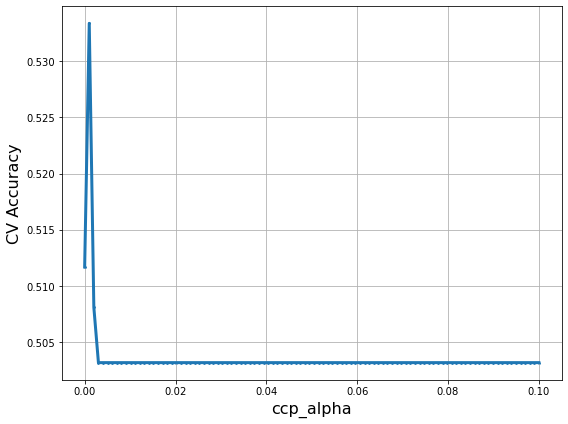

Best ccp_alpha {'ccp_alpha': 0.00101010101010101}


In [348]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 5


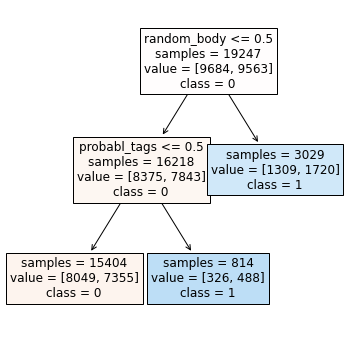

In [349]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [350]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[3147 1079]
 [2764 1259]]

Accuracy: 0.5341253485270941


/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 3l_body
- level_body
- multiple_tags
Feature names seen at fit time, yet now missing:
- 0l_body
- normal_tags
- run_body

  warnings.warn(message, FutureWarning)


In [34]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_values = {'max_features': np.linspace(1,60,60, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf_cv.fit(X, y)
toc = time.time()
print('time:', round(toc-tic, 2),'s')

KeyboardInterrupt: 

In [ ]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [ ]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

In [ ]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X, y)

/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [30]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x >= 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 3l_body
- level_body
- multiple_tags
Feature names seen at fit time, yet now missing:
- 0l_body
- normal_tags
- run_body

  warnings.warn(message, FutureWarning)


TypeError: 'builtin_function_or_method' object is not iterable

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2684 1542]
 [2086 1937]]

Accuracy: 0.5601891138319797


/Users/sanjliagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 3l_body
- level_body
- multiple_tags
Feature names seen at fit time, yet now missing:
- 0l_body
- normal_tags
- run_body

  warnings.warn(message, FutureWarning)
